In [105]:
import pandas as pd
%load_ext autoreload
%autoreload 2

import scipy.stats as stats
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from helpers import *

data_folder = 'DATA/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\lucil\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\lucil\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lucil\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lucil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [106]:
# load data
movie_data = pd.read_csv(data_folder + 'movie_data_final.csv')
character_data = pd.read_csv(data_folder + 'characters_data.csv')

C:\Users\lucil\AppData\Local\Temp\ipykernel_18644\1265909551.py:3: DtypeWarning: Columns (2,3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  character_data = pd.read_csv(data_folder + 'characters_data.csv')


In [107]:
movie_data

,IMDB_ID,wikipedia_ID,freebase_ID,runtime,name,release_date,genre,plot_summary,box_office_revenue,popularity,main characters,main character genders
0,tt0228333,975900.0,/m/03vyhn,98.0,Ghosts of Mars,2001.0,"['Adventure', 'Thriller', 'Horror', 'Supernatu...","Set in the second half of the 22nd century, th...",14010832.0,0.031534,NaN,NaN
1,tt0245916,3196793.0,/m/08yl5d,95.0,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,"['Biography', 'Drama', 'Mystery']",NaN,NaN,NaN,NaN,NaN
2,tt0002894,13696889.0,/m/03cfc81,35.0,The Gangsters,1913.0,"['Indie', 'Comedy']",NaN,NaN,NaN,NaN,NaN
3,tt0029852,10408933.0,/m/02qc0j7,106.0,Alexander's Ragtime Band,1938.0,"['Musical', 'Comedy']",NaN,3600000.0,NaN,NaN,NaN
4,tt0021335,175026.0,/m/017n1p,86.0,Sarah and Son,1930.0,['Drama'],NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
53631,tt9913288,NaN,NaN,NaN,Letters,2020.0,[],"[""Charlie Porter is an ordinary man. He leads ...",NaN,NaN,['charlie porter'],['M']
53632,tt9914522,NaN,NaN,NaN,The Holden Family Plan,2019.0,[],"[""When Mackenzie Holden's sister and brother i...",NaN,NaN,"['mackenzie holden', 'evan', 'jade']","['F', 'M', 'F']"
53633,tt9914582,NaN,NaN,NaN,However Long,2019.0,[],['Documentary following four women with incura...,NaN,NaN,NaN,NaN
53634,tt9914642,NaN,NaN,NaN,Albatross,2017.0,[],"[""ALBATROSS is a powerful visual journey into ...",NaN,NaN,NaN,NaN


In [108]:
movie_data['genre'] = movie_data['genre'].apply(ast.literal_eval)

In [109]:
# ADD THIS AT THE END OF DATA CREATION NOTEBOOK
#movie_data_final = pd.merge(movie_data, main_char_data[['IMDB_ID', 'main characters', 'main character genders']], how='left', on='IMDB_ID')
# movie_data_final
#movie_data_final.to_csv(data_folder + 'movie_data_final.csv', index=False)

In [110]:
# ADD THIS TOO
movie_data['decade'] = np.floor((movie_data['release_date']/10))*10

In [111]:
movie_data

,IMDB_ID,wikipedia_ID,freebase_ID,runtime,name,release_date,genre,plot_summary,box_office_revenue,popularity,main characters,main character genders,decade
0,tt0228333,975900.0,/m/03vyhn,98.0,Ghosts of Mars,2001.0,"[Adventure, Thriller, Horror, Supernatural, Ac...","Set in the second half of the 22nd century, th...",14010832.0,0.031534,NaN,NaN,2000.0
1,tt0245916,3196793.0,/m/08yl5d,95.0,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,"[Biography, Drama, Mystery]",NaN,NaN,NaN,NaN,NaN,2000.0
2,tt0002894,13696889.0,/m/03cfc81,35.0,The Gangsters,1913.0,"[Indie, Comedy]",NaN,NaN,NaN,NaN,NaN,1910.0
3,tt0029852,10408933.0,/m/02qc0j7,106.0,Alexander's Ragtime Band,1938.0,"[Musical, Comedy]",NaN,3600000.0,NaN,NaN,NaN,1930.0
4,tt0021335,175026.0,/m/017n1p,86.0,Sarah and Son,1930.0,[Drama],NaN,NaN,NaN,NaN,NaN,1930.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53631,tt9913288,NaN,NaN,NaN,Letters,2020.0,[],"[""Charlie Porter is an ordinary man. He leads ...",NaN,NaN,['charlie porter'],['M'],2020.0
53632,tt9914522,NaN,NaN,NaN,The Holden Family Plan,2019.0,[],"[""When Mackenzie Holden's sister and brother i...",NaN,NaN,"['mackenzie holden', 'evan', 'jade']","['F', 'M', 'F']",2010.0
53633,tt9914582,NaN,NaN,NaN,However Long,2019.0,[],['Documentary following four women with incura...,NaN,NaN,NaN,NaN,2010.0
53634,tt9914642,NaN,NaN,NaN,Albatross,2017.0,[],"[""ALBATROSS is a powerful visual journey into ...",NaN,NaN,NaN,NaN,2010.0


# Clustering
The idea is to create a dataframe for each movie with the characteristics extracted from the data that could make them more or less stereotypical, namely:
- proportion of women in the movie
- female/male ratio of main character
- difference between mean age of men and of women

The clustering algorithm should thus group movies together that have similar level of gender stereotypes. We can then analyse the movies in these clusters to see if movie some genres, decades or popularity scores are more present in stereotypical movies. We can also analyse how the number of stereotypical movies evolve throughout the decades.

In [112]:
# remove character with unknown genders
character_data = character_data.dropna(subset='actor_gender')

### Proportion of female actress

In [113]:
# compute proportion of female actress per movie
characters_per_movie = character_data.groupby('IMDB_ID')
proportion_female = characters_per_movie['actor_gender'].apply(lambda x: (x == 'F').sum() / len(x))

In [114]:
# create a dataframe on which we will perform clustering
stereotype_df = pd.DataFrame({'IMDB_ID': proportion_female.index, 'proportion_female': proportion_female.values})

### Proportion of female main character

In [115]:
movie_data = movie_data.dropna(subset='main character genders')
# compute the proportion of female main character for each movie
main_characters_ratio = movie_data['main character genders'].apply(calculate_gender_ratio)
movie_data['proportion_female_main_char'] = main_characters_ratio

C:\Users\lucil\AppData\Local\Temp\ipykernel_18644\3129871300.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data['proportion_female_main_char'] = main_characters_ratio


In [116]:
# merge with clustering dataframe and keep only movies with known main character proportions
stereotype_df = pd.merge(stereotype_df, movie_data[['IMDB_ID', 'proportion_female_main_char', 'decade']], on='IMDB_ID', how='left')
stereotype_df = stereotype_df.dropna(subset='proportion_female_main_char')

In [117]:
stereotype_df

,IMDB_ID,proportion_female,proportion_female_main_char,decade
12,tt0002143,0.800000,0.000000,1910.0
52,tt0002509,0.600000,0.500000,1910.0
66,tt0002618,0.166667,0.666667,1910.0
70,tt0002663,0.250000,0.500000,1910.0
80,tt0002755,0.444444,0.000000,1910.0
...,...,...,...,...
46921,tt9907782,0.500000,0.000000,2020.0
46922,tt9908448,0.600000,1.000000,2010.0
46923,tt9908592,0.666667,0.000000,2010.0
46927,tt9913288,0.000000,0.000000,2020.0


### Age difference
Here we compute the difference of the mean age between men and women. This is added to the clustering data set since movies with much older men than women could be considered as more stereotypical. A negative value in the difference of means indicates that men are older than women.

In [118]:
mean_ages = compute_difference_mean_ages(character_data)
stereotype_df = pd.merge(stereotype_df, mean_ages[['IMDB_ID', 'difference_mean_ages']], on='IMDB_ID', how='left')
stereotype_df = stereotype_df.dropna(subset='difference_mean_ages')
stereotype_df

,IMDB_ID,proportion_female,proportion_female_main_char,decade,difference_mean_ages
0,tt0002143,0.800000,0.000000,1910.0,-8.000000
1,tt0002509,0.600000,0.500000,1910.0,-0.333333
2,tt0002618,0.166667,0.666667,1910.0,-7.400000
3,tt0002663,0.250000,0.500000,1910.0,-8.333333
4,tt0002755,0.444444,0.000000,1910.0,-9.050000
...,...,...,...,...,...
12491,tt9898858,0.500000,0.333333,2020.0,-4.000000
12492,tt9899726,0.500000,1.000000,2010.0,-21.000000
12495,tt9904648,0.500000,0.333333,2020.0,-3.000000
12496,tt9907782,0.500000,0.000000,2020.0,-9.500000


### Character personas
TODO

### Clustering with K-means
Before doing the clustering, we need to pre-process the data. Proportions of female and of female main character are already normalised. We thus only need to normalise the age difference. We also identify the optimal number of clusters.

In [119]:
# prepare the data for clustering
clustering_df = stereotype_df.drop(columns=['IMDB_ID', 'decade'])
clustering_df['difference_mean_ages'] = MinMaxScaler().fit_transform(clustering_df['difference_mean_ages'].values.reshape(-1, 1))

To find the optimal value of k for the clustering, we plot the sum squared error (sse) of the clustering for different k. The graph should show an "elbow", i.e. a k for which further increasing k does not lead to a decrease as important as before of the sse.

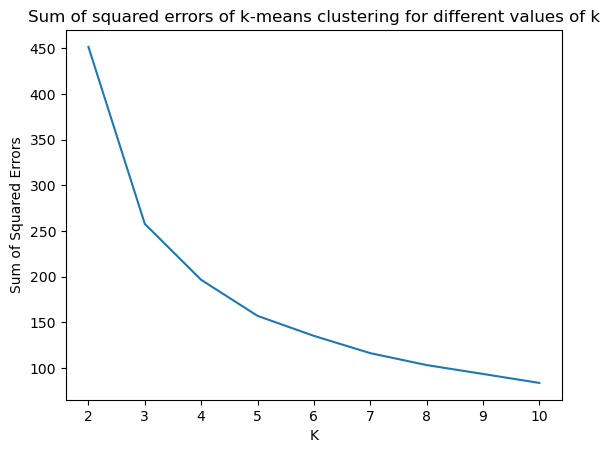

In [120]:
plot_sse(clustering_df)

We see on the plot above that the elbow of the curve is located at n=3. However, one could also see a second elbow at k=5. We will thus perform a second analysis to determine the appropriate k. We will choose the k with the highest silhouette score.

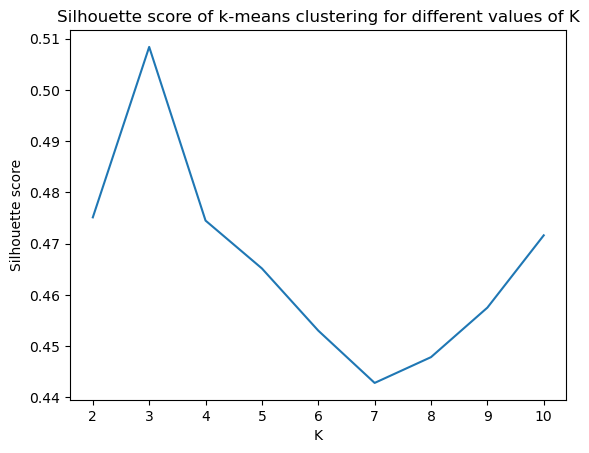

In [121]:
silhouettes = []

# Try multiple k
for k in range(2, 11):
    # Cluster the data and assigne the labels
    labels = KMeans(n_clusters=k, random_state=10, n_init=10).fit_predict(clustering_df)
    # Get the Silhouette score
    score = silhouette_score(clustering_df, labels)
    silhouettes.append({"k": k, "score": score})

# Convert to dataframe
silhouettes = pd.DataFrame(silhouettes)

# Plot the data
plt.plot(silhouettes.k, silhouettes.score)
plt.xlabel("K")
plt.ylabel("Silhouette score")
plt.title('Silhouette score of k-means clustering for different values of K')
plt.show()

We see on the plot above that the K with the highest silhouette score is 3. This confirmed what we observed using the elbow method and we will thus perform k-means clustering with k=3.

In [122]:
# run k-means
kmean = KMeans(n_clusters=3, random_state=0, n_init=10).fit(clustering_df)

### Visualising the clusters

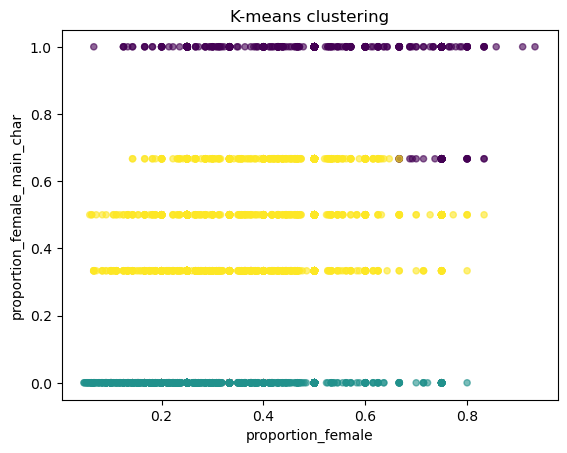

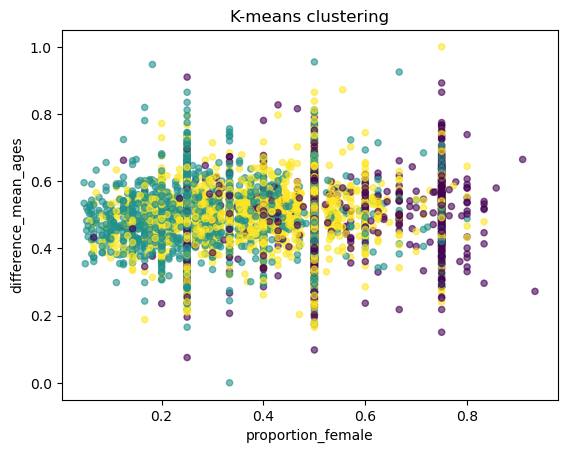

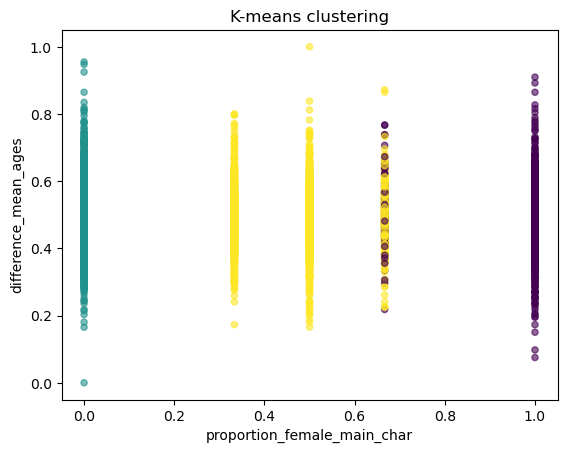

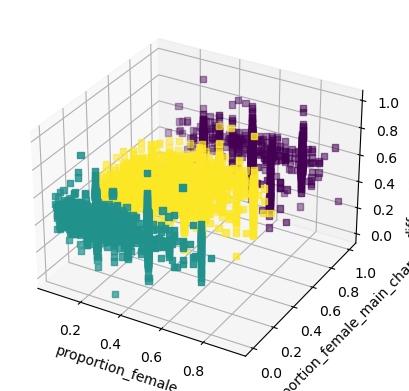

In [123]:
plot_kmeans_2d(clustering_df, kmean.labels_, ['proportion_female', 'proportion_female_main_char'])
plot_kmeans_2d(clustering_df, kmean.labels_, ['proportion_female', 'difference_mean_ages'])
plot_kmeans_2d(clustering_df, kmean.labels_, ['proportion_female_main_char', 'difference_mean_ages'])
plot_kmeans_3d(clustering_df, kmean.labels_, ['proportion_female', 'proportion_female_main_char', 'difference_mean_ages'])

### Analysing the clusters

We will first look at the movies in each clusters to see if they were indeed clustered according to which extant they have a stereotypical depiction of women.

In [124]:
# add k-means label to the dataset that also contains IMDB IDs
stereotype_df['cluster_index'] = kmean.labels_
stereotype_df.drop(columns=['IMDB_ID', 'decade']).groupby('cluster_index').mean()

,proportion_female,proportion_female_main_char,difference_mean_ages
cluster_index,,,
0,0.531609,0.977797,-6.755061
1,0.321196,0.000000,-8.079249
2,0.398346,0.461334,-7.196680


We see that cluster 0 seems to be the less stereotypical with a higher proportion of women in the cast and as main character and a smaller difference of means than the other clusters. Cluster 1 seems to be the most stereotypical. Indeed, we observe that movies in this cluster never have women as main characters and that they have a low proportion of actresses. Additionally, the difference of age between women and men is also higher than for movies in the other clusters. Cluster 2 seems to be located in between clusters 0 and 1 with a moderate amount of actresses both in general and playing main characters and an age difference bigger than cluster 0 but smaller than cluster 1. Since in the current analysis we are mostly interested in extremes (stereotypical and non-stereotypical movies), we will discard cluster 2 and focus on cluster 0 and 1.

In [125]:
# select most and least stereotypical movies according to the clustering
not_stereotypical_ids = stereotype_df[(stereotype_df['cluster_index'] == 0)]['IMDB_ID']
not_stereotypical_movies = movie_data[movie_data['IMDB_ID'].isin(not_stereotypical_ids)]
stereotypical_ids = stereotype_df[(stereotype_df['cluster_index'] == 1)]['IMDB_ID']
stereotypical_movies = movie_data[movie_data['IMDB_ID'].isin(stereotypical_ids)]

### A) Number of movies
As a first analysis we will have a look at the percentage of movies that belong to each category

In [126]:
not_stereo_percent = not_stereotypical_movies.shape[0]*100/stereotype_df.shape[0]
stereo_percent = stereotypical_movies.shape[0]*100/stereotype_df.shape[0]
print(f'{not_stereo_percent:.2f}% of movies do not represent women in a stereotypical way')
print(f'{stereo_percent:.2f}% of movies represent women in a stereotypical way')
print(f'{100-not_stereo_percent-stereo_percent:.2f}% were not classified into one of these categories')

16.74% of movies do not represent women in a stereotypical way
37.21% of movies represent women in a stereotypical way
46.05% were not classified into one of these categories


We see already that movies that clearly represent women in a non-stereotypical ways are in minority. Of course these percentages are computed on only a subset of our movies for which we were able to compute all the variables necessary for the clustering, but here we make the assumption that this subset is representative of the whole set of US movies.

### B) Popularity
Now we will analyse whether more popular movies tend to be more or less stereotypical. We can do this by using a t-test on the distribution of popularity for both datasets. The null hypothesis is "stereotypical and non-stereotypical movies have the same average popularity".

In [127]:
ttest_results = stats.ttest_ind(stereotypical_movies['popularity'].dropna(), not_stereotypical_movies['popularity'].dropna())
print(f't-statistics = {ttest_results.statistic}, p value = {ttest_results.pvalue}')

t-statistics = 1.2158898915315504, p value = 0.22444449661983146


The p-value is higher than 0.05. We thus cannot reject the null hypothesis and make any conclusions. This might be due to the fact that we have very little data on the popularity of movies and would need more to make any meaningful conclusions.

### C) Genres
The aim of this part is to explore which genre stereotypical and non-stereotypical movies belong to. We will start by looking at the genres present in our two categories of movies.

In [128]:
not_stereotypical_genre_counts = not_stereotypical_movies['genre'].explode().value_counts()
stereotypical_genre_counts = stereotypical_movies['genre'].explode().value_counts()

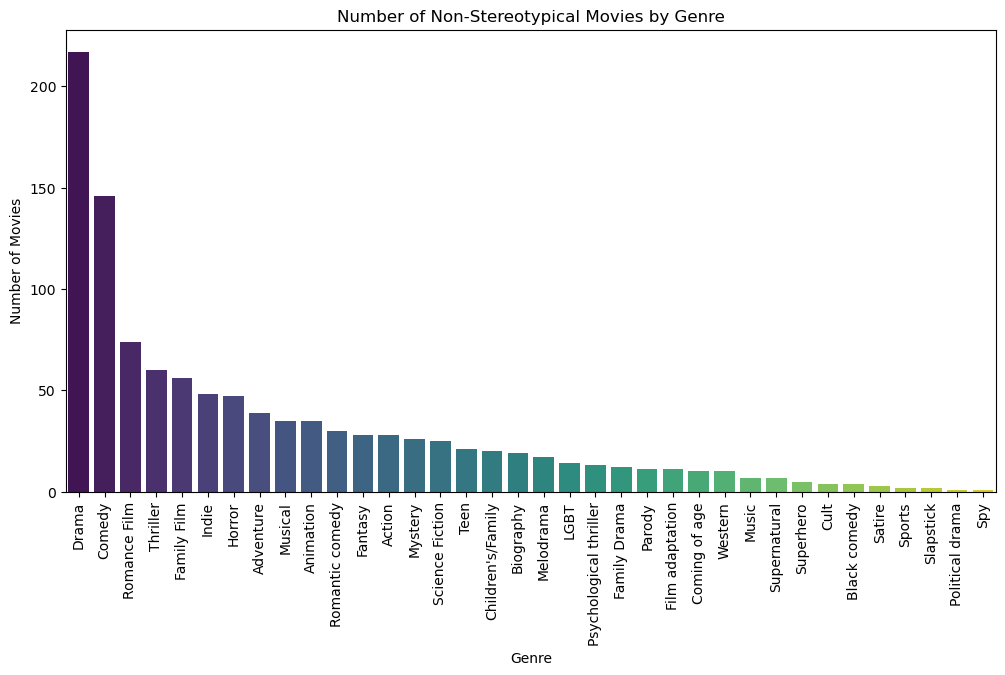

In [129]:
plt.figure(figsize=(12, 6))
sns.barplot(x=not_stereotypical_genre_counts.index, y=not_stereotypical_genre_counts.values, palette='viridis')
plt.title('Number of Non-Stereotypical Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

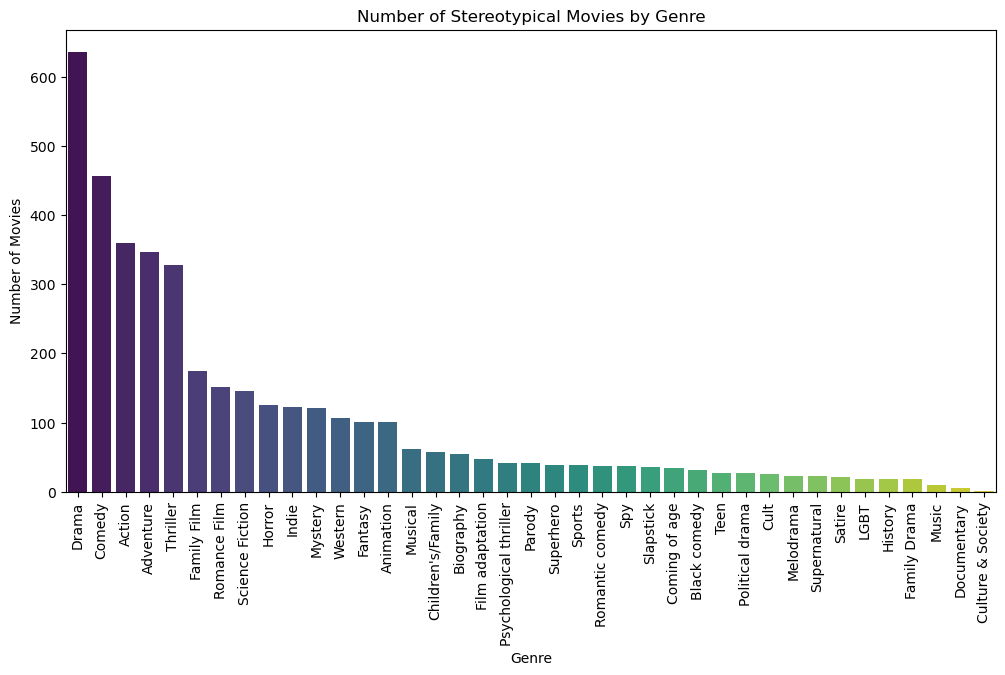

In [130]:
plt.figure(figsize=(12, 6))
sns.barplot(x=stereotypical_genre_counts.index, y=stereotypical_genre_counts.values, palette='viridis')
plt.title('Number of Stereotypical Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

We see that a variety of genres are present in the two categories. Let's see how different the proportions of genre in each category is. Since the number of movies is different for stereotypical and non-stereotypical movies, we first normalise by the total number of movies for each category and then study the difference of this ratio.

In [131]:
# let's have a look at the difference
# first transform counts into percentages
percentage_stereo = stereotypical_genre_counts/stereotypical_movies.shape[0]
percentage_not_stereo = not_stereotypical_genre_counts/not_stereotypical_movies.shape[0]
# do the difference
percentage_diff = percentage_not_stereo - percentage_stereo
# if one genre is not present in one of the 2 categories we set its percentage to 0 in this category instead of nan
for genre in percentage_diff[percentage_diff.isna()].index:
    if stereotypical_genre_counts[genre] !=0:
        percentage_diff[genre] = -stereotypical_genre_counts[genre]/stereotypical_movies.shape[0]
    elif not_stereotypical_genre_counts[genre] != 0:
        percentage_diff[genre] = not_stereotypical_genre_counts[genre]/not_stereotypical_movies.shape[0]

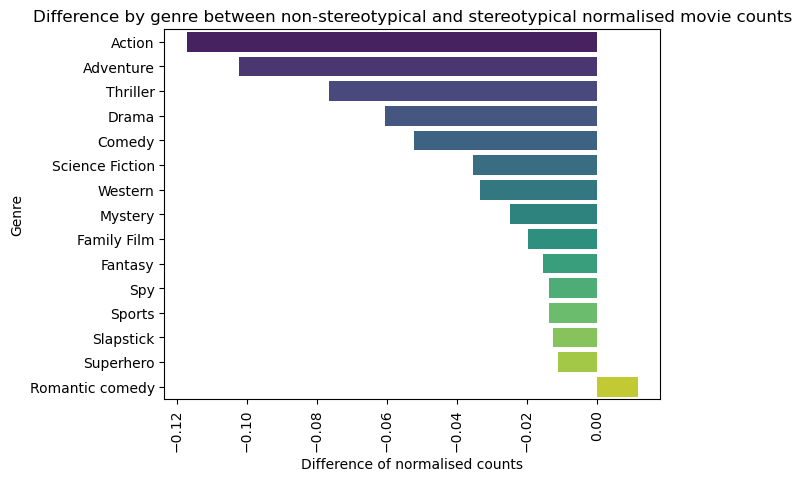

In [132]:
# sort in increasing order to plot
percentage_diff = percentage_diff.sort_values()
# only keep genres that have at least 1% difference between the 2 categories
percentage_diff_to_plot = percentage_diff[(percentage_diff.values > 0.01) | (percentage_diff.values < -0.01)]
# plot
sns.barplot(x=percentage_diff_to_plot, y=percentage_diff_to_plot.index , palette='viridis', orient='h')
#sns.barplot(y=percentage_diff_to_plot, x=percentage_diff_to_plot.index , palette='viridis', orient='v')
plt.xticks(rotation=90)
plt.title('Difference by genre between non-stereotypical and stereotypical normalised movie counts')
plt.xlabel('Difference of normalised counts')
plt.ylabel('Genre')
plt.show()

The plot above represents the difference of ratio between the not stereotypical and the stereotypical movies. If the difference is negative it means that there is a higher proportion of this movie genre in the stereotypical movies. Inversely, if the difference is positive, it means that there is a higher proportion of this movie genre in the non-stereotypical movies.

Action movies are the ones that have the most difference between our two categories. The proportion of action movies in our stereotypical category is 12% more than the one in our non-stereotypical category. We see that there are quite a few other categories that have a difference of proportion of more than 1%. The top 5 genre that appear more in the stereotypical movies are:
1. Action
2. Adventure
3. Thriller
4. Drama
5. Comedy

# TODO: Relate to other analysis wrt genre -> does it make sense with what we saw

Interestingly, there is only one genre that has a positive difference: romantic comedies. This means that we had more romantic movies that fell into the not-stereotypical category than into the stereotypical one.

# TODO: link with vocabulary analysis
e.g. we saw previously that women in romantic movies were most often love interests. So even though they are often main characters (which makes them fall into our non-stereotypical category) they might not really have their own story lines and thus one could argue that these movies should also be classified as stereotypical but that our clustering method was not able to capture this effect.


### D) Decades
After these first analyses, we will now look at how the the stereotypical and not stereotypical movies evolve through the decades.

Let's first simply have a look at whether the distribution of decades throughout the stereotypical and not stereotypical datasets differ. To do so, we perform a t-test with the null hypothesis "stereotypical movies have the same mean release decade as non-stereotypical ones".

In [133]:
ttest_results = stats.ttest_ind(stereotypical_movies['decade'].dropna(), not_stereotypical_movies['decade'].dropna())
print(f't-statistics = {ttest_results.statistic}, p value = {ttest_results.pvalue}')

t-statistics = -7.045176023921748, p value = 2.2015444435497535e-12


The results of the t-test indicate that we can reject the null hypothesis at a significance level of 0.05. We can thus conclude that there is a difference in mean release decade between stereotypical and non-stereotypical movies. Moreover, since the t-statistics is negative, we can conclude that stereotypical movies tend to have been release in earlier decades than non-stereotypical movies. This is coherent with our original hypothesis that was that as women's rights progresses, their representation in the cinema industry evolves to be less biased.

To further explore the link between the decades and the extent of gender representation in movies, we will have a look at the proportion of movies released that had a stereotypical representation of women per decade.

In [134]:
# Group movies by decade
stereo_movie_by_decade = stereotypical_movies.groupby(stereotypical_movies['decade'])
not_stereo_movie_by_decade = not_stereotypical_movies.groupby(not_stereotypical_movies['decade'])
total_movies = movie_data[movie_data['IMDB_ID'].isin(stereotype_df['IMDB_ID'])]
total_movies_per_year = total_movies.groupby(total_movies['decade'])

# compute fraction of total movies per decade for each category
fraction_stereo_movies_decade = stereo_movie_by_decade.size()/total_movies_per_year.size()
fraction_not_stereo_movies_decade = not_stereo_movie_by_decade.size()/total_movies_per_year.size()
others = 1-fraction_not_stereo_movies_decade-fraction_stereo_movies_decade

# compute confidence interval using bootstrap
lower_stereo, upper_stereo, lower_not_stereo, upper_not_stereo = bootstrap_ci_stereotypical_movies(stereotype_df)

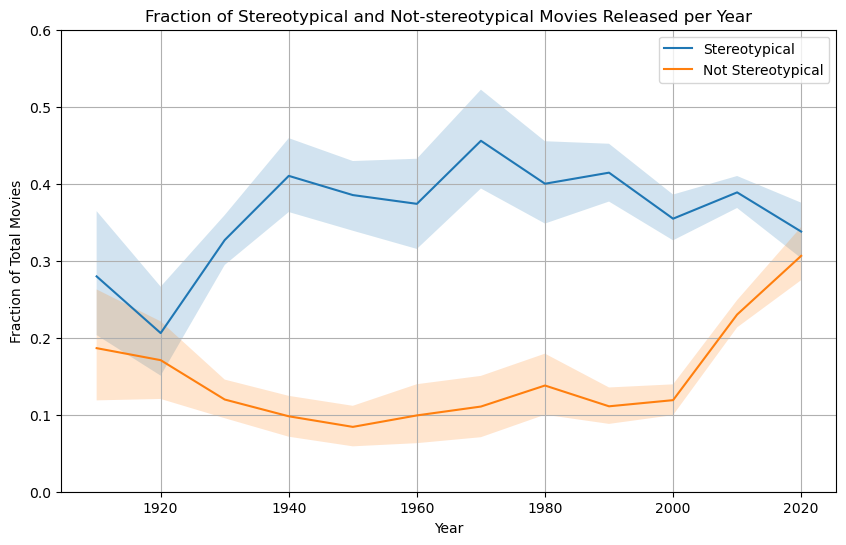

In [135]:
# Plot
# Interpolate values to align with timeline

plt.figure(figsize=(10, 6))
fraction_stereo_movies_decade.plot(kind='line', label='Stereotypical')
fraction_not_stereo_movies_decade.plot(kind='line', label='Not Stereotypical')

plt.fill_between(fraction_stereo_movies_decade.index, lower_stereo, upper_stereo, alpha=0.2)
plt.fill_between(fraction_not_stereo_movies_decade.index, lower_not_stereo, upper_not_stereo, alpha=0.2)

plt.title('Fraction of Stereotypical and Not-stereotypical Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Fraction of Total Movies')
plt.legend()
plt.grid(True)
plt.ylim(0,0.6)
plt.show()

We see that before 1920 the confidence interval intercepts and we thus cannot reach any conclusions. However, we see that from 1920 up to 2020 there seem to always have been a bigger percentage of movies produced that had a stereotypical depiction of women. From 1920 to 1940 we see an increase in the stereotypical movies produced. In the 70s the proportion of stereotypical movies was almost 50% and is the highest in the years analysed. It then seems to be slightly going down until 2020 but always being between 30-45%. Interestingly, the proportion of non-stereotypical movies was relatively stable throughout the decades until 2000. From 2000 to 2020 we see a strong increase of the proportion of movies with a non-stereotypical depiction of women to reach approximately the same percentage than stereotypical movies.

In conclusion, we can see that the depiction of women evolved through time. Indeed, even though the proportion of stereotypical movies increased in the early 20th century and then stayed at a relatively high level, the proportion of movies having representation of women going against stereotypes increased drastically from 2000 to 2020.

Finally, we will try to see wether any of these could be explained by the events in our timeline.


In [136]:
timeline = pd.read_csv(data_folder + 'timeline.csv')

Let's see which events could have prompted the increase of non-stereotypical movies in 2000 and later. Since movies take a lot of time to be made, we can assume that events from the 1990s and later could influence this increase and that events after 2018 (5 years ago) did not have enough time to really affect the cinema industry yet.

In [137]:
timeline[(timeline['Date']>=1990)&(timeline['Date']<2018)]

,Date,Event
22,1993,"Nominated by President Bill Clinton, Janet Re..."
23,1997,"Also nominated by Clinton, Madeleine Albright..."
24,1994,Clinton signs the Violence Against Women Act ...
25,2007,U.S. Rep. Nancy Pelosi (D-Calif.) becomes the...
26,2013,The U.S. military removes a ban against women...
27,2016,Hillary Clinton becomes the first woman to re...


We see that we have multiple events where women acceded to a position of power (first female attorney, first female secretary of state, first female speaker of the house). This could have shaped the vision of women in the US and prompted movies to be made with more women as main and supporting characters.

We can also have a look at which events could have influenced the fact that the proportion of stereotypical movies started decreasing in the 1970s.

In [138]:
timeline[(timeline['Date']>=1960)&(timeline['Date']<1970)]

,Date,Event
12,1960,The Food and Drug Administration (FDA) approve...
13,1963,President John F. Kennedy signs into law the ...
14,1964,"President Lyndon B. Johnson, signs the Civil ..."
15,1966,"Betty Friedan, author of 1963’s The Feminine ..."


Here we observe that two major events for women's right in the US happened in the 60s: the Equal Pay Act and the Civil Rights Act. The Equal Pay Act prohibits a difference of salary based on sex while the Civil Rights Act prohibits (amongst others) employment discrimination based on sex. These two events were a huge step towards gender equality and they might have a prompted a change in mentality that reflected in less movies being produce with very little women in them. However, it is important to note that since the confidence interval are quite high, we cannot be sure that the trend observed in the 70s is accurate and the number of stereotypical movies during this period could also just have stayed the same.

To conclude, the trend observed for stereotypical movie cannot be confirmed due to the size of the confidence intervals, but could be associated with some historical events. Most importantly, the increase of non-stereotypical movies in the past 20 years coincide well with the increase of women in position of power in the US. Of course, we cannot state that this increase is due to these specific events and that probably a lot of other factor influenced this. It is however still an interesting link to make.